# Desafío - Regresión desde la econometría

# Contexto

En este desafío trabajaremos con un registro de clientes de un banco e información sobre su salud financiera.

La base contenida en el csv Credit contiene las siguientes variables:

    ●Income: Ingreso anual disponible en miles de dólares.
    ●Limit: Límite del crédito.
    ●Rating: Ranking del crédito.
    ●Cards: Cantidad de tarjetas de crédito.
    ●Age: Edad del usuario.
    ●Education: Años de educación del usuario.
    ●Gender: ¿Hombre o mujer?
    ●Student: ¿Es estudiante?
    ●Married: ¿Está casado?
    ●Ethnicity: Etnicidad del usuario (Caucásico, Afroamericano,Asiático)
    ●Balance: Promedio de deuda en tarjeta de crédito deusuario.

# Desafío 1: Prepare el ambiente de trabajo

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

df = pd.read_csv("credit.csv").drop(columns = 'Unnamed: 0')
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [32]:
df.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [33]:
df.isnull().sum() #Observamos que el df no tiene datos nulos

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [34]:
df = pd.get_dummies(df).drop(
    columns = ['Gender_Female','Student_No','Married_No','Ethnicity_African American']).rename(
    columns = {'Gender_ Male':'Male','Student_Yes':'Student','Married_Yes':'Married','Ethnicity_Asian':'Asian','Ethnicity_Caucasian':'Caucasian'})

df

,Income,Limit,Rating,Cards,Age,Education,Balance,Male,Student,Married,Asian,Caucasian
0,14.891,3606,283,2,34,11,333,1,0,1,0,1
1,106.025,6645,483,3,82,15,903,0,1,1,1,0
2,104.593,7075,514,4,71,11,580,1,0,0,1,0
3,148.924,9504,681,3,36,11,964,0,0,0,1,0
4,55.882,4897,357,2,68,16,331,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560,1,0,1,0,1
396,13.364,3838,296,5,65,17,480,1,0,0,0,0
397,57.872,4171,321,5,67,12,138,0,0,1,0,1
398,37.728,2525,192,1,44,13,0,1,0,1,0,1


# Desafío 2: Genere gráficos descriptivos para las variablescontinuas

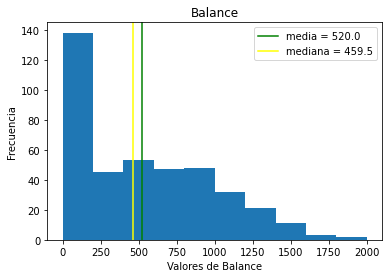

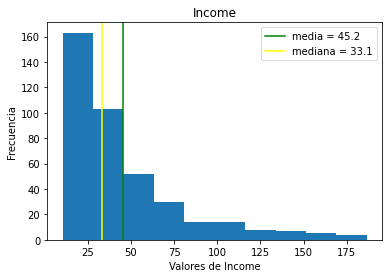

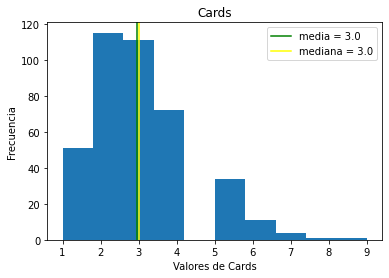

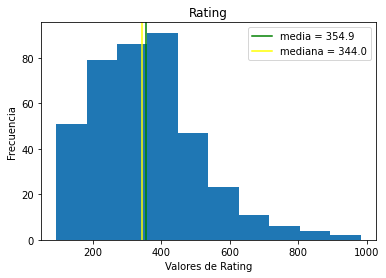

In [35]:
def plot_hist(dataframe,variable):
    plt.hist(dataframe[variable])
    plt.axvline(dataframe[variable].mean(), label = f"media = {round(dataframe[variable].mean(),1)}", color = 'green')
    plt.axvline(dataframe[variable].median(), label = f"mediana = {round(dataframe[variable].median(),1)}", color = 'yellow')
    plt.title(variable)
    plt.xlabel(f"Valores de {variable}")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()

#ints = list(df.select_dtypes(include = 'int64').columns)
for i in ['Balance', 'Income', 'Cards' , 'Rating']:
    plot_hist(df,i)

# ¿Cuál es el comportamiento de Balance, Income, Cards y Rating?


 **RESPUESTA**

Balance:
En promedio las personas tienen 520 usd de Balance, "cercano" a la mediana que es 460 usd aprox.
Por otro lado, hay una gran cantidad de personas que tienen entre 0 y 200 usd en su balance, luego de 1.000 usd empieza a 
decaer los casos con más de 1.000 usd en su balance.

Income:
La media son 45.200 dólares, y la mediana 33.100 dólares, hay una grán cantidad de casos que ganan menos de 50 mil
dólares anuales, mucho más "cargado" entre 0 y 25 mil dólares de hecho.

Cards:
Interesante notar que el promedio y la mediana son 3 tarjetas por usuario. La "gran masa" está én torno a las 2 a 4 tarjetas.

Rating:
El rating tiene una distribución más parecida a gaussiana, la gran masa está entre los 200 y los 450, ya desde 500
de rating en adelante empieza a decaer bastante.

# Desafío 3: Regresión Lineal Simple

# a) ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance?

In [37]:
modelo1 = sm.OLS(df.Balance,df.Student).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Balance   R-squared (uncentered):                   0.160
Model:                            OLS   Adj. R-squared (uncentered):              0.158
Method:                 Least Squares   F-statistic:                              75.86
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                    8.19e-17
Time:                        19:47:17   Log-Likelihood:                         -3149.6
No. Observations:                 400   AIC:                                      6301.
Df Residuals:                     399   BIC:                                      6305.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Student      876.8250    100.672      8.710      0.000     678.911    1074.739
==============================================================================
Omnibus:                        8.217   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.111
Skew:                           0.336   Prob(JB):                       0.0173
Kurtosis:                       3.187   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
modelo2 = sm.OLS(df.Balance,df.Income).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Balance   R-squared (uncentered):                   0.608
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              620.0
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                    2.99e-83
Time:                        19:47:17   Log-Likelihood:                         -2996.9
No. Observations:                 400   AIC:                                      5996.
Df Residuals:                     399   BIC:                                      6000.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Income         9.4429      0.379     24.899      0.000       8.697      10.189
==============================================================================
Omnibus:                        7.690   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                6.591
Skew:                           0.239   Prob(JB):                       0.0371
Kurtosis:                       2.591   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
modelo3 = sm.OLS(df.Balance,df.Rating).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Balance   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                              2065.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                   7.91e-160
Time:                        19:47:17   Log-Likelihood:                         -2820.3
No. Observations:                 400   AIC:                                      5643.
Df Residuals:                     399   BIC:                                      5647.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rating         1.6405      0.036     45.443      0.000       1.570       1.712
==============================================================================
Omnibus:                       24.189   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.549
Skew:                           0.641   Prob(JB):                     1.04e-06
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance?


**RESPUESTA**

La variable más explicativa de las tres es RATING, dado que tiene el r cuadrado más alto de los 3 modelos
que intentan modelar Balance (rcuadrado = 0.838)

# b) ¿Qué podemos decir sobre el comportamiento de Student?


¿Qué pasa si aplicamos una prueba de hipotesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

In [43]:
grupo1 = df[df['Student'] == 1]['Balance'] #Son estudiantes
grupo0 = df[df['Student'] == 0]['Balance'] #NO son estudiantes

list(stats.ttest_ind(grupo0, grupo1))

[-5.349964123075003, 1.4877341077323024e-07]

# **RESPUESTA**

En base al resultado de test de muestras independientes, se ve que las medias son claramente DISTINTAS, por tanto la variable
student diferencia entre balances de estudiantes y balances de NO estudiantes

# Desafío 4: Generar un modelo que incluya todos los regresores

Comente brevemente sobre el poder explicativo en la varianza de <code>𝑦</code> y las principales características de los predictores.

In [50]:
modelo4 = sm.OLS(df.Balance,df.drop(columns = 'Balance')).fit()
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Balance   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1177.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                   9.10e-291
Time:                        19:55:20   Log-Likelihood:                         -2477.4
No. Observations:                 400   AIC:                                      4977.
Df Residuals:                     389   BIC:                                      5021.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Income        -7.3174      0.282    -25.990      0.000      -7.871      -6.764
Limit          0.3418      0.038      9.107      0.000       0.268       0.416
Rating        -1.3243      0.555     -2.384      0.018      -2.416      -0.232
Cards         14.8711      5.273      2.820      0.005       4.505      25.238
Age           -2.3854      0.321     -7.432      0.000      -3.016      -1.754
Education    -14.8057      1.514     -9.780      0.000     -17.782     -11.829
Male          -8.5015     11.935     -0.712      0.477     -31.966      14.963
Student      422.0096     20.332     20.756      0.000     382.035     461.985
Married      -24.0274     12.526     -1.918      0.056     -48.655       0.600
Asian        -29.4496     16.670     -1.767      0.078     -62.224       3.324
Caucasian    -32.9886     14.345     -2.300      0.022     -61.192      -4.785
==============================================================================
Omnibus:                        5.296   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.305
Skew:                           0.255   Prob(JB):                       0.0705
Kurtosis:                       2.757   Cond. No.                     1.81e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **RESPUESTA**

WOW, nuestro modelo rápidamente entregó un poder explicativo súper súper alto, casi 1 (0.971 exactamente)

# Desafío 5: Depure el modelo e incluya sólo los predictores significativos

a) En base al modelo anterior, refactoriza e incluya sólo las variables con un nivel de significancia <code>𝑝−𝑣𝑎𝑙𝑢𝑒≤.025</code>

Comente brevemente sobre el poder explicativo en la varianza de <code>y</code> y las principales característicasde los predictores.

In [54]:
modelo5 = sm.OLS(df.Balance,df.drop(columns = ['Balance','Male','Married','Asian'])).fit()
modelo5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Balance   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1595.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                   1.08e-293
Time:                        20:45:28   Log-Likelihood:                         -2481.8
No. Observations:                 400   AIC:                                      4980.
Df Residuals:                     392   BIC:                                      5012.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Income        -7.3103      0.283    -25.797      0.000      -7.867      -6.753
Limit          0.3581      0.037      9.613      0.000       0.285       0.431
Rating        -1.5781      0.550     -2.867      0.004      -2.660      -0.496
Cards         14.8380      5.292      2.804      0.005       4.433      25.243
Age           -2.4104      0.322     -7.481      0.000      -3.044      -1.777
Education    -16.1553      1.449    -11.148      0.000     -19.004     -13.306
Student      425.1854     20.338     20.906      0.000     385.200     465.171
Caucasian    -19.9074     11.986     -1.661      0.098     -43.473       3.658
==============================================================================
Omnibus:                        6.917   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.729
Skew:                           0.279   Prob(JB):                       0.0346
Kurtosis:                       2.696   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# ¿Mejoró o empeoró el modelo con la reducción de regresores?

**Respuesta**

Cambió muy muy poco el rcuadrado, apenas un 0,001, empeoró muy muy muy poco, al parecer es buen threshold el p_value <= 0.025

# Desafío 6

Utilizando <code>lmplot</code> de seaborn, inspeccione el comportamiento de los tres principales determinantes

Respuesta: Los tres principales determinantes son: Income, Student, Education

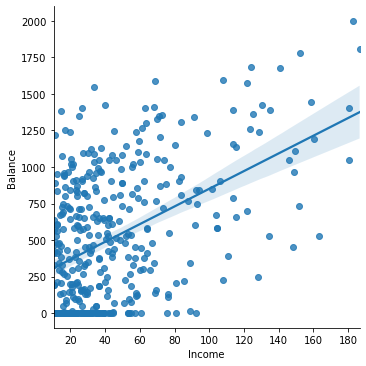

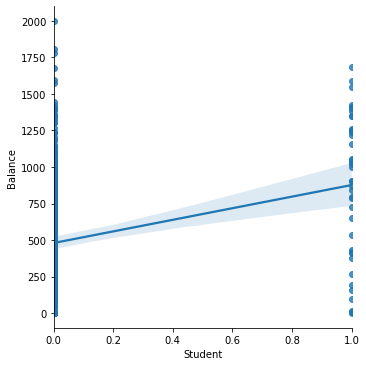

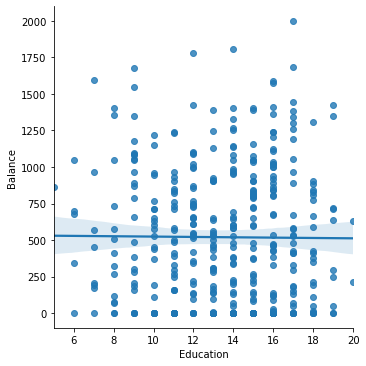

In [58]:
sns.lmplot(data = df,
           x = 'Income',
           y = 'Balance',
           )
plt.show()
sns.lmplot(data = df,
           x = 'Student',
           y = 'Balance',
           )
plt.show()
sns.lmplot(data = df,
           x = 'Education',
           y = 'Balance',
           )
plt.show()

# **COMENTARIOS**

Es interesante notar lo inútil que puede ser lmplot para variables en que nuestro summary dice que están bien relacionadas a la variable objetivo "balance"

Sin Embargo, la variable CONTINUA Income sí se puede apreciar su correlación positiva a través de lmplot, por tanto lmplot no es siempre una buena forma de analizar si una variable es determinante o no, se debe analizar de otra forma, como lo hicimos al inicio.